In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

Light_1 = pd.read_csv('TimeSeries_DataSet\Light_02to04.csv', parse_dates=True, index_col='date', date_parser=dateparse)

Light_2 = pd.read_csv('TimeSeries_DataSet\Light_04to10.csv', parse_dates=True, index_col='date', date_parser=dateparse)

Light_3 = pd.read_csv('TimeSeries_DataSet\Light_11to18.csv', parse_dates=True, index_col='date', date_parser=dateparse)


Temperature_1 = pd.read_csv('TimeSeries_DataSet\Temperature_02to04.csv', parse_dates=True, index_col='date', date_parser=dateparse)

Temperature_2 = pd.read_csv('TimeSeries_DataSet\Temperature_04to10.csv', parse_dates=True, index_col='date', date_parser=dateparse)

Temperature_3 = pd.read_csv('TimeSeries_DataSet\Temperature_11to18.csv', parse_dates=True, index_col='date', date_parser=dateparse)


CO2_1 = pd.read_csv('TimeSeries_DataSet\CO2_02to04.csv', parse_dates=True, index_col='date', date_parser=dateparse)

CO2_2 = pd.read_csv('TimeSeries_DataSet\CO2_04to10.csv', parse_dates=True, index_col='date', date_parser=dateparse)

CO2_3 = pd.read_csv('TimeSeries_DataSet\CO2_11to18.csv', parse_dates=True, index_col='date', date_parser=dateparse)


HumidityRatio_1 = pd.read_csv('TimeSeries_DataSet\HumidityRatio_02to04.csv', parse_dates=True, index_col='date', date_parser=dateparse)

#HumidityRatio_2 = pd.read_csv('TimeSeries_DataSet\HumidityRatio_04to10.csv', parse_dates=True, index_col='date', date_parser=dateparse)

#HumidityRatio_3 = pd.read_csv('TimeSeries_DataSet\HumidityRatio_11to18.csv', parse_dates=True, index_col='date', date_parser=dateparse)



In [14]:
HumidityRatio_2 = pd.read_csv('TimeSeries_DataSet\HumidityRatio_04to10.csv')

In [18]:
y = HumidityRatio_2['Occupancy']
X = HumidityRatio_2["HumidityRatio"]
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify = y)


In [2]:
# Abbiamo bisogno di keras perché il metodo per estrarre gli shapelets è basato sulla libreria keras
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
# Questo è lo stesso metodo che ha presentato a lezione
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

Using TensorFlow backend.
c:\users\matte\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\matte\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\matte\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [29]:
X = np.array(X).reshape(-1,1)

In [20]:
#Dobbiamo conosere il numero di time series e la lenght
n_ts, ts_sz = HumidityRatio_2.shape
# Il numero delle classe
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
#C'è un metodo della libreria per conoscere la lenght degli shapelet, in questo caso 3
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 8143
ts_sz 3
n_classes 2
shapelet_sizes {1: 4}


In [21]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
# Questo è il modello. Passiamo il numero di shapelet, l'optimizzazione ecc
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [30]:
# Quando facciamo il fit otteniamo un output simile a quello delle reti neurali, perché è basato su keras
shp_clf.fit(X, y)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/200
8143/8143 [==============================] - 0s 39us/step - loss: 0.5833 - binary_accuracy: 0.8093 - binary_crossentropy: 0.5670
Epoch 2/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.5556 - binary_accuracy: 0.8074 - binary_crossentropy: 0.5390
Epoch 3/200
8143/8143 [==============================] - 0s 5us/step - loss: 0.5351 - binary_accuracy: 0.8065 - binary_crossentropy: 0.5181
Epoch 4/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.5208 - binary_accuracy: 0.8012 - binary_crossentropy: 0.5035
Epoch 5/200
8143/8143 [==============================] - 0s 5us/step - loss: 0.5116 - binary_accuracy: 0.7922 - binary_crossentropy: 0.4940
Epoch 6/200
8143/8143 [==============================] - 0s 5us/step - loss: 0.5058 - binary_accuracy

8143/8143 [==============================] - 0s 6us/step - loss: 0.4906 - binary_accuracy: 0.8017 - binary_crossentropy: 0.4774
Epoch 53/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.4905 - binary_accuracy: 0.8019 - binary_crossentropy: 0.4774
Epoch 54/200
8143/8143 [==============================] - 0s 5us/step - loss: 0.4903 - binary_accuracy: 0.8018 - binary_crossentropy: 0.4773
Epoch 55/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.4902 - binary_accuracy: 0.8023 - binary_crossentropy: 0.4773
Epoch 56/200
8143/8143 [==============================] - 0s 8us/step - loss: 0.4901 - binary_accuracy: 0.8024 - binary_crossentropy: 0.4773
Epoch 57/200
8143/8143 [==============================] - 0s 7us/step - loss: 0.4900 - binary_accuracy: 0.8027 - binary_crossentropy: 0.4773
Epoch 58/200
8143/8143 [==============================] - 0s 5us/step - loss: 0.4899 - binary_accuracy: 0.8027 - binary_crossentropy: 0.4772
Epoch 59/200
8143/8143 [==

Epoch 109/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.4857 - binary_accuracy: 0.8063 - binary_crossentropy: 0.4760
Epoch 110/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.4857 - binary_accuracy: 0.8063 - binary_crossentropy: 0.4760
Epoch 111/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.4856 - binary_accuracy: 0.8063 - binary_crossentropy: 0.4760
Epoch 112/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.4856 - binary_accuracy: 0.8063 - binary_crossentropy: 0.4760
Epoch 113/200
8143/8143 [==============================] - 0s 5us/step - loss: 0.4855 - binary_accuracy: 0.8065 - binary_crossentropy: 0.4760
Epoch 114/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.4855 - binary_accuracy: 0.8063 - binary_crossentropy: 0.4759
Epoch 115/200
8143/8143 [==============================] - 0s 5us/step - loss: 0.4854 - binary_accuracy: 0.8065 - binary_crossentropy: 0.4759
Epoch 

8143/8143 [==============================] - 0s 6us/step - loss: 0.4832 - binary_accuracy: 0.8074 - binary_crossentropy: 0.4752
Epoch 167/200
8143/8143 [==============================] - 0s 5us/step - loss: 0.4831 - binary_accuracy: 0.8078 - binary_crossentropy: 0.4752
Epoch 168/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.4831 - binary_accuracy: 0.8074 - binary_crossentropy: 0.4751
Epoch 169/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.4831 - binary_accuracy: 0.8077 - binary_crossentropy: 0.4751
Epoch 170/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.4830 - binary_accuracy: 0.8076 - binary_crossentropy: 0.4751
Epoch 171/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.4830 - binary_accuracy: 0.8076 - binary_crossentropy: 0.4751
Epoch 172/200
8143/8143 [==============================] - 0s 6us/step - loss: 0.4830 - binary_accuracy: 0.8077 - binary_crossentropy: 0.4751
Epoch 173/200
8143/8

ShapeletModel(batch_size=256, max_iter=200, n_shapelets_per_size={1: 4},
              optimizer='sgd', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=0.01)

In [32]:
# Chiamo il predict, non ha fatto la divisione in training e test perché è stato lazy
predicted_labels = shp_clf.predict(X)
print("Correct classification rate:", accuracy_score(y, predicted_labels))

8143/8143 [==============================] - 0s 6us/step
Correct classification rate: 0.8079331941544885


In [40]:
# La locate aiuta a trovare e visualizzare la shaplet
predicted_locations = shp_clf.locate(X)

 256/8143 [..............................] - ETA: 0s

c:\users\matte\appdata\local\programs\python\python37\lib\site-packages\tslearn\utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 8143 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


8143/8143 [==============================] - 0s 2us/step


[[0.00280123]]
[[0.73144579]]
[[-0.18832833]]
[[1.77118182]]


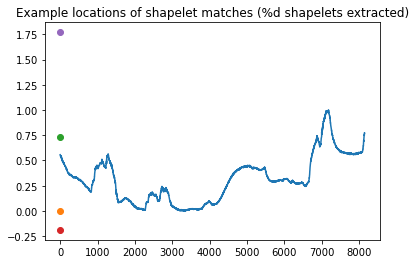

In [59]:
# Abbiamo 3 shapelet, 
ts_id = 0 # Questa è la prima istanza 
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X.ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    print(shp)
    t0 = predicted_locations[ts_id,idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=20000, marker='o')
#La locaction ci permette di vedere l'allineamento della time series rispetto allo shapelet. Utile per capire perché una
# certa time serie è classificata con una certa label